In [100]:
from multi_depots import *
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


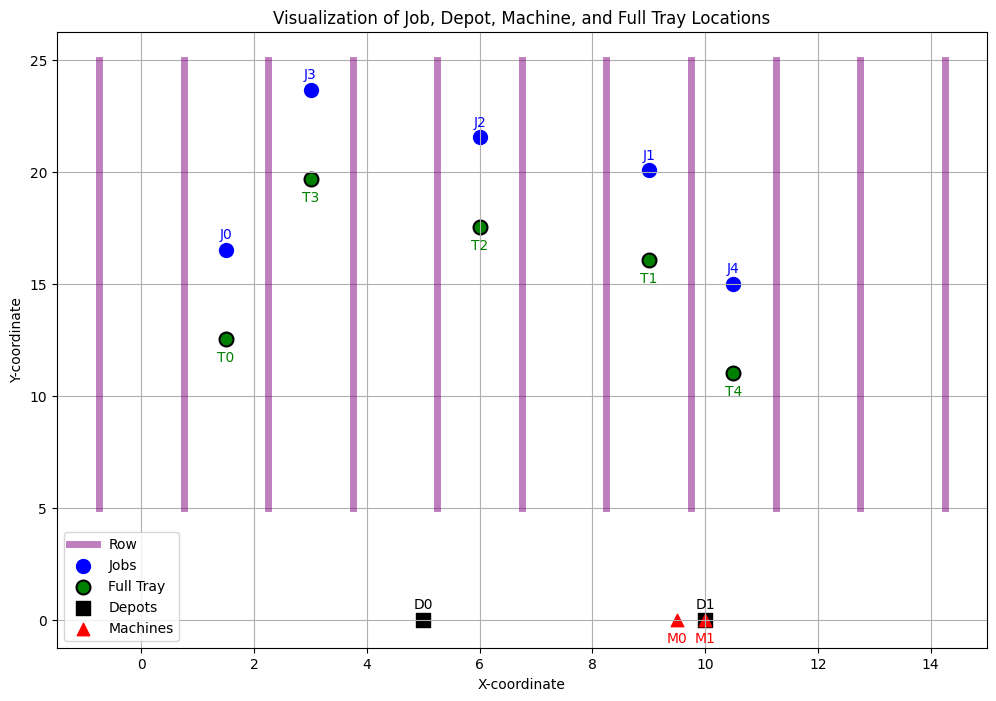

In [101]:
# Example Usage
num_jobs = 5
num_machines = 2
num_depots = 2
num_rows = 10
picker_speed = 0.2

(job_locations, full_tray_times, depots, 
 machine_availables, machine_depots) = randomize_settings(num_jobs, num_machines, num_depots, 
                                                          num_rows=10, row_width=1.5, row_length=25, 
                                                          seed=10,machine_available_range=20, 
                                                          job_release_range=20, 
                                                          headland_space=5, picker_speed=0.5)

# Visualize settings
visualize_settings_with_full_tray_locations(job_locations, depots, full_tray_times, machine_depots, picker_speed=picker_speed, 
                                            num_rows=num_rows, row_width=1.5, row_length=25, headland_space=5)


In [102]:
result = solve_scheduling_model(job_locations, full_tray_times, depots, 
                               machine_availables, machine_depots)
plt.show()


Set parameter Heuristics to value 0.707
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (linux64 - "Ubuntu 22.04.5 LTS")

CPU model: 13th Gen Intel(R) Core(TM) i7-13700F, instruction set [SSE2|AVX|AVX2]
Thread count: 24 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 337 rows, 155 columns and 1378 nonzeros
Model fingerprint: 0x77b1f58d
Variable types: 0 continuous, 155 integer (126 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+05]
Found heuristic solution: objective 156.0000000
Presolve removed 76 rows and 50 columns
Presolve time: 0.00s
Presolved: 261 rows, 105 columns, 1248 nonzeros
Variable types: 0 continuous, 105 integer (84 binary)
Found heuristic solution: objective 155.0000000



Root relaxation: objective 2.000000e+01, 64 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   20.00000    0    5  155.00000   20.00000  87.1%     -    0s
H    0     0                      99.0000000   20.00000  79.8%     -    0s
H    0     0                      80.0000000   20.00000  75.0%     -    0s
     0     0   20.00000    0    5   80.00000   20.00000  75.0%     -    0s
     0     2   20.00000    0    5   80.00000   20.00000  75.0%     -    0s
H  185   163                      79.0000000   20.00000  74.7%   5.6    0s
*  343   233              15      78.0000000   20.00000  74.4%   5.0    0s
H  388   249                      75.0000000   20.00000  73.3%   4.8    0s
H  434   249                      73.0000000   20.00000  72.6%   4.6    0s

Cutting planes:
  Learned: 43
  Inf proof: 5

Explored 7025 nodes (18423 simplex ite

In [103]:
model = result["model"]
E = result["E"]
v = result["v"]
s = result["s"]
process_times = result["P"]
machines = result["machines"]
jobs = result["jobs"]
depots = result["depots"]
T = result["T"]
release_times = result["release_times"]
process_times = result["process_times"]
full_tray_times = result["full_tray_times"]
full_tray_locations = result["full_tray_locations"]


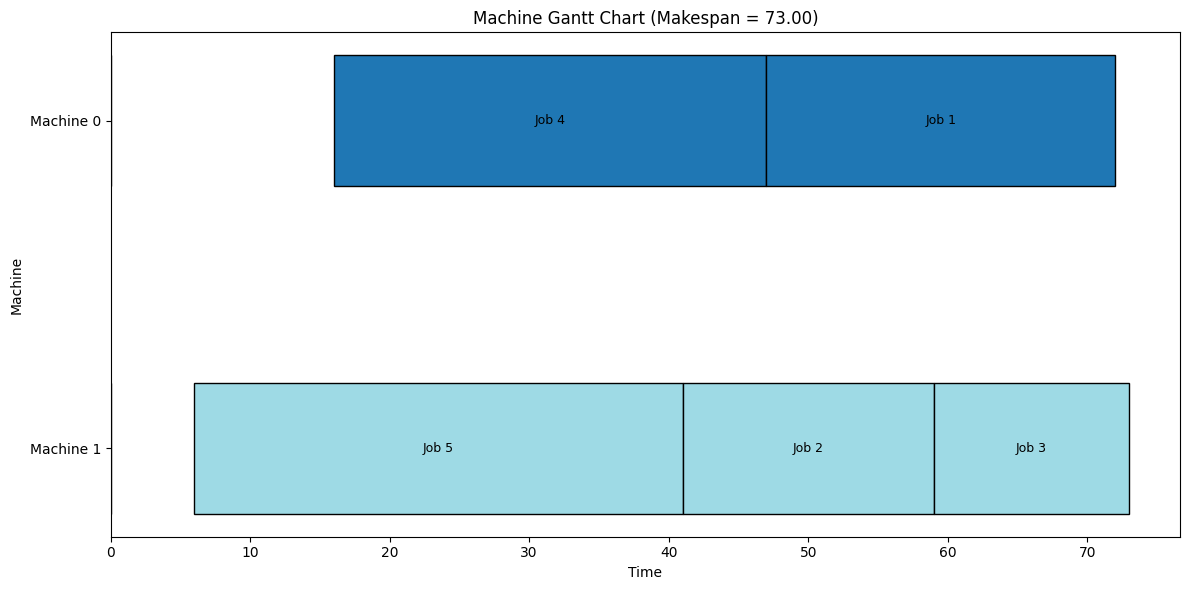

In [104]:
plot_machine_gantt(model, E, v, s, process_times, machines, jobs, depots, num_jobs, T)

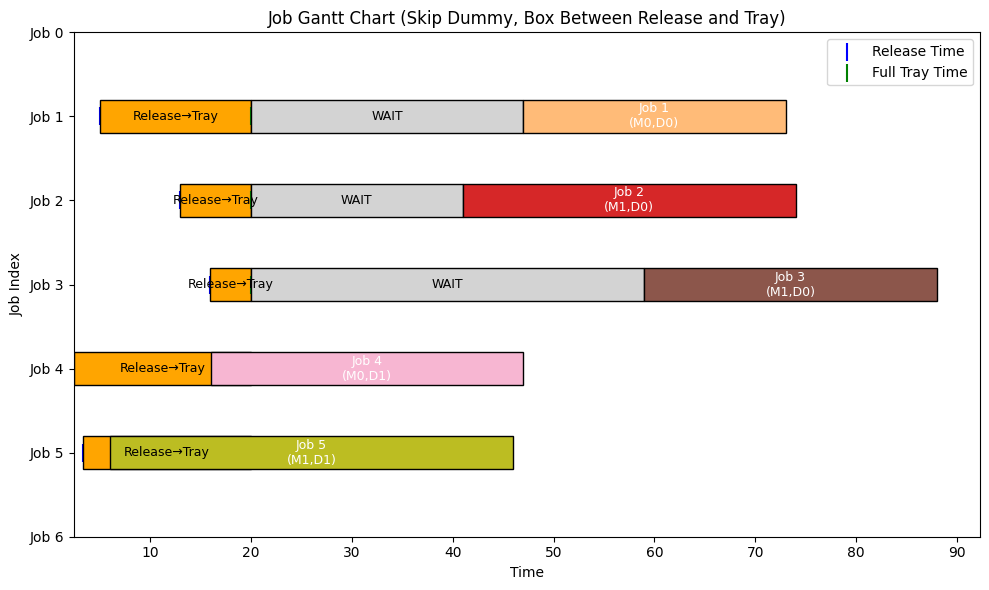

In [107]:
release_times
plot_job_gantt_solution(result)